<a href="https://colab.research.google.com/github/KalyaniKudalkar/Data-Analytics-1_Exercises/blob/main/Group_Exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Exercises 2 - Neural Networks


*   Kalyani Kudalkar
*   Bhakti Mendpara                                                             



The goal is to explore and compare the performance of different neural network architectures: Feedforward Neural Network (FFNN), Convolutional Neural Network (CNN), Recurrent Neural Network (RNN), and Long Short-Term Memory (LSTM) by plotting the performance metrics (e.g., accuracy, loss) and visualizations to compare the methods.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 **Feedforward Neural Network (FFNN)**


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3298 - loss: 1.6231 - val_accuracy: 0.6094 - val_loss: 1.1167
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5480 - loss: 1.1760 - val_accuracy: 0.6641 - val_loss: 0.9506
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5915 - loss: 1.0692 - val_accuracy: 0.6562 - val_loss: 0.9106
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5564 - loss: 1.0462 - val_accuracy: 0.6641 - val_loss: 0.8913
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5918 - loss: 1.0081 - val_accuracy: 0.6719 - val_loss: 0.8884
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6068 - loss: 0.9950 - val_accuracy: 0.6719 - val_loss: 0.8782
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5888 - loss: 0.9876 - val_accuracy: 0.6680 - val_loss: 0.8727
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5859 - loss: 1.0000 - val_accuracy: 0.6602 - val_loss: 0.8759
Ep

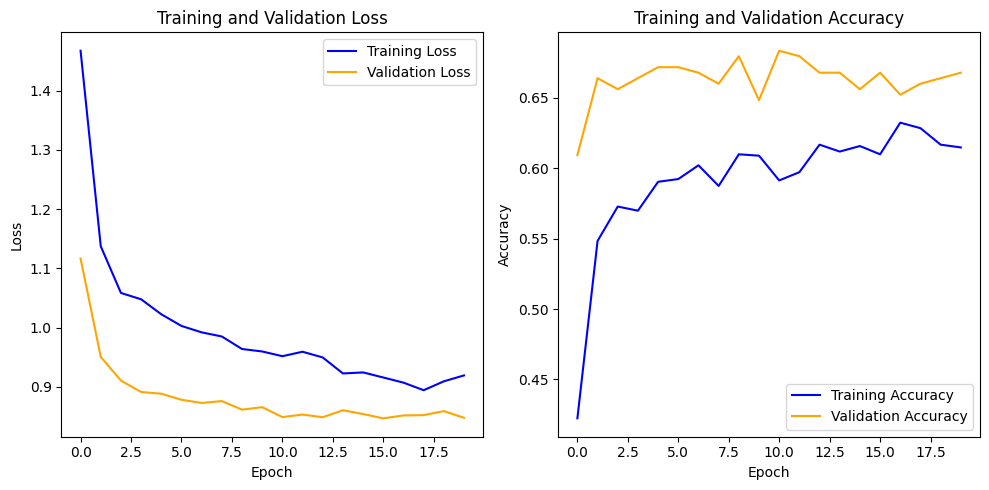

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

X = df.drop('quality', axis=1)
y = df['quality']

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')  ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Justification**

Here, we have used FFNN for performing basic classification tasks.

As seen in graphs 1, the training loss decreases steadily, which indicates that the model effectively learned patterns from the training data where as the validation loss stabilizes after a few epochs, suggesting that the model generalized reasonably well without excessive overfitting.

In graph 2, the training accuracy improves significantly across epochs, demonstrating the model's ability to fit the data and the validation accuracy follows a similar trend but stabilizes earlier, with a gap between training and validation accuracy. This indicates minor overfitting.

**Convolutional Neural Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3375 - loss: 1.6228 - val_accuracy: 0.5742 - val_loss: 1.1861
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5160 - loss: 1.2735 - val_accuracy: 0.5664 - val_loss: 1.0829
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5517 - loss: 1.1246 - val_accuracy: 0.5938 - val_loss: 1.0298
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5302 - loss: 1.0768 - val_accuracy: 0.6094 - val_loss: 1.0012
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5701 - loss: 1.0766 - val_accuracy: 0.6289 - val_loss: 0.9685
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5907 - loss: 1.0297 - val_accuracy: 0.6133 - val_loss: 0.9846
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5698 - loss: 1.0044 - val_accuracy: 0.6289 - val_loss: 0.9446
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5774 - loss: 1.0486 - val_accuracy: 0.6250 - val_loss

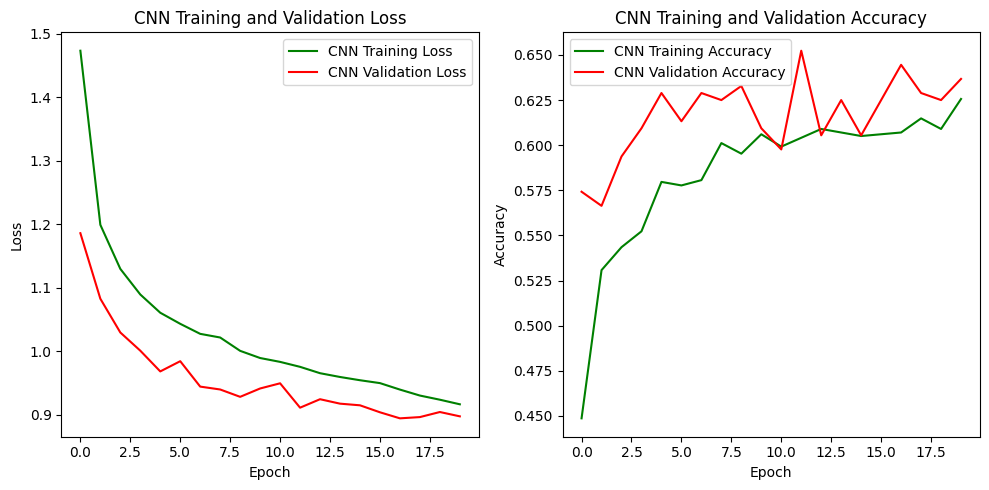

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Standardize features
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to 2D for scaling
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)    # Reshape to 2D for scaling

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# CNN Model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss',color='green')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy',color='green')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Justification**

The graph 1 for the CNN training loss shows steady decrease, indicating that the model was learning effectively where as the validation loss plateaued after a few epochs, suggesting the model reached its generalization limit.

In graph 2, the training accuracy increased consistently, and validation accuracy plateaued near 56.6% which suggests the model was not overfitting significantly.

**Recurrent Neural Network (RNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2636 - loss: 1.7473 - val_accuracy: 0.6016 - val_loss: 1.3735
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5442 - loss: 1.3765 - val_accuracy: 0.6367 - val_loss: 1.1364
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5865 - loss: 1.1729 - val_accuracy: 0.6602 - val_loss: 1.0262
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5610 - loss: 1.1125 - val_accuracy: 0.6680 - val_loss: 0.9746
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5839 - loss: 1.0669 - val_accuracy: 0.7031 - val_loss: 0.9353
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5867 - loss: 1.0065 - val_accuracy: 0.6797 - val_loss: 0.9202
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5760 - loss: 1.0232 - val_accuracy: 0.6758 - val_loss: 0.9035
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5773 - loss: 1.0216 - val_accuracy: 0.6719 - val_loss

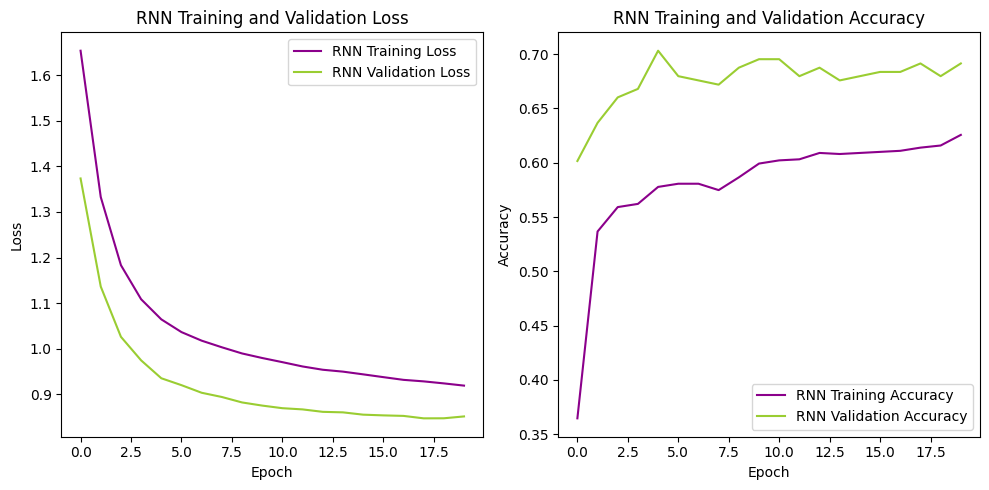

In [ ]:
X_train_reshaped_rnn = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_reshaped_rnn = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

 # RNN Model
rnn_model = keras.Sequential([layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped_rnn.shape[1], X_train_reshaped_rnn.shape[2])),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')])
rnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_reshaped_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = rnn_model.evaluate(X_test_reshaped_rnn, y_test)
print(f"RNN Test Loss: {loss:.4f}")
print(f"RNN Test Accuracy: {accuracy:.4f}")
y_pred_rnn = np.argmax(rnn_model.predict(X_test_reshaped_rnn), axis=1)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy_rnn)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss',color='darkmagenta')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss',color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy',color='darkmagenta')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy',color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Justification**

In graph 1, the training loss decreases steadily suggesting that the model is learning from the data, while validation loss plateaus after a few epochs.

In graph 2, the training accuracy improves steadily, while validation accuracy increases initially and then stabilizes with slight fluctuations.

**Long Short-Term Memory (LSTM)**



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3773 - loss: 1.7158 - val_accuracy: 0.4180 - val_loss: 1.1733
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4781 - loss: 1.1996 - val_accuracy: 0.4453 - val_loss: 1.1125
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5126 - loss: 1.1162 - val_accuracy: 0.5938 - val_loss: 1.0605
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5372 - loss: 1.0965 - val_accuracy: 0.6367 - val_loss: 1.0098
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5439 - loss: 1.0939 - val_accuracy: 0.6016 - val_loss: 0.9791
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5610 - loss: 1.0469 - val_accuracy: 0.6445 - val_loss: 0.9496
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5421 - loss: 1.0467 - val_accuracy: 0.6445 - val_loss: 0.9248
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5593 - loss: 1.0204 - val_accuracy: 0.6367 - val_loss: 0.9217

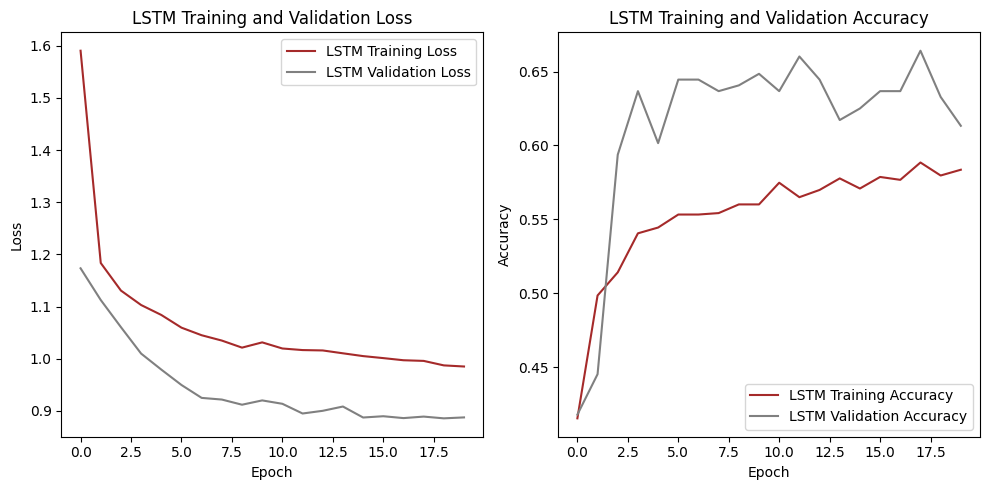

In [ ]:
 # LSTM Model

X_train_reshaped_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

lstm_model = keras.Sequential([layers.LSTM(64, input_shape=(X_train_reshaped_lstm.shape[1], X_train_reshaped_lstm.shape[2])),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')])
lstm_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train_reshaped_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = lstm_model.evaluate(X_test_reshaped_lstm, y_test)
print(f"LSTM Test Loss: {loss:.4f}")
print(f"LSTM Test Accuracy: {accuracy:.4f}")
y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped_lstm), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss',color='brown')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss',color='gray')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy',color='brown')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy',color='gray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Justification**

In graph 1, the training loss consistently decreased during training but plateaued for validation, indicating early convergence.

In graph 2,the training accuracy steadily increased, while validation accuracy hovered between 54%-66%.

**Comparison between FFNN, CNN, RNN and LSTM**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_ffnn = precision_score(y_test, y_pred, average='weighted')
recall_ffnn = recall_score(y_test, y_pred, average='weighted')
f1_ffnn = f1_score(y_test, y_pred, average='weighted')

precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')

precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

data = {
    'Model': ['FFNN', 'CNN', 'RNN', 'LSTM'],
    'Accuracy': [accuracy, accuracy_cnn, accuracy_rnn, accuracy_lstm],
    'Precision': [precision_ffnn, precision_cnn, precision_rnn, precision_lstm],
    'Recall': [recall_ffnn, recall_cnn, recall_rnn, recall_lstm],
    'F1-Score': [f1_ffnn, f1_cnn, f1_rnn, f1_lstm]
 }
comparison_df = pd.DataFrame(data)
comparison_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

,Model,Accuracy,Precision,Recall,F1-Score
0,FFNN,0.546875,0.554227,0.590625,0.569192
1,CNN,0.543750,0.513041,0.543750,0.525296
2,RNN,0.578125,0.538130,0.578125,0.554778
3,LSTM,0.546875,0.510730,0.546875,0.521222


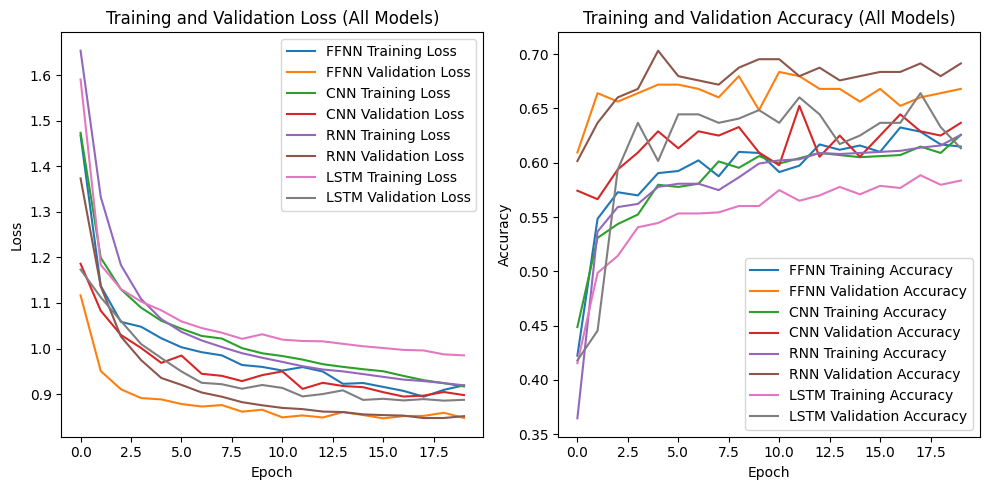

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='FFNN Training Loss')
plt.plot(history.history['val_loss'], label='FFNN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (All Models)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='FFNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='FFNN Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (All Models)')
plt.legend()
plt.tight_layout()
plt.show()


**Justification**

In the first graph, the loss curves indicate all models reduced training loss steadily, but validation loss plateaued or slightly increased.
Particularly, the FFNN and CNN had similar validation loss, demonstrating decent generalization. However, the RNN and LSTM showed fluctuating validation loss, potentially overfitting to training data.

In the second graph, all models improved accuracy over epochs, but none reached exceptional accuracy.
Here, the CNN and RNN showed better validation accuracy than FFNN and LSTM, highlighting their effectiveness in capturing some underlying patterns.

Based on the reported accuracy and generalization, we can say that the CNN and RNN performed slightly better for the dataset that we have selected from Kaggle.
